# Problem
Gegeben seien die Anzahl der fünf Produkte $\mathcal{I}$, die Gesamtmenge der Stationen $\mathcal{S}$ sowie die Tage $\mathcal{T}$ des Januars 2016. Für jedes Produkt ist am Anfang des Monats eine Menge $Q^{(i)}$ verfügbar um über den ganzen Monat verteilt verkauft zu werden.

## Ziel
Ziel ist die Maximierung des Gewinns

$$
\Pi(q,p) = \sum_{s\in\mathcal{S}}\sum_{t\in\mathcal{T}}\sum_{i\in\mathcal{i}}q_{sit}\cdot p_{sit}
$$

Wobei der Absatz gegeben ist durch $q_{sit}\cdot p_{sit}$ welches die Quantität aller Produkte angeboten zum Preis $p_{sit}$ darstellt. 

Die Nebenbedingungen sind wie folgt definierbar:
\begin{enumerate}
    \item $\sum_{s\in\mathcal{S}}\sum_{t\in\mathcal{T}} \; q_{ist} \leq Q_i \; \forall i \in \mathcal{I}$ (Offered quantity must not exceed available supply)
    \item $p_{ist} \leq \hat{p}_{ist} \; \forall i \in \mathcal{I}$ (Price should be the lowest possible for the $i$-th product)
    \item $q_{ist} \leq \hat{q}_{ist} \; \forall i \in \mathcal{I}$
\end{enumerate}

---

Verbesserungen:
* Für zu wenig verkaufte Produkte werden Kosten von $C_U$ veranschlagt.

Variablen: 

* $c^Tx \rightarrow min$
* $Ax \leq b$
* $x \geq 0$

wobei:
* $x$: zu optimierende Variablen ($q, p$)
* $c$: 1-Vektor?

In [1]:
# lets find out if there is a correlation between price and demand
df.antibiotics <- read.csv('../output/df_antibiotics_imputed.csv', row.names = NULL)
df.tengu <- read.csv('../output/df_tengu_imputed.csv', row.names = NULL)
df.veldspar <- read.csv('../output/df_veldspar_imputed.csv', row.names = NULL)
df.nanite <- read.csv('../output/df_nanite_repair_paste_imputed.csv', row.names = NULL)
df.tritanium <- read.csv('../output/df_tritanium_imputed.csv', row.names = NULL)

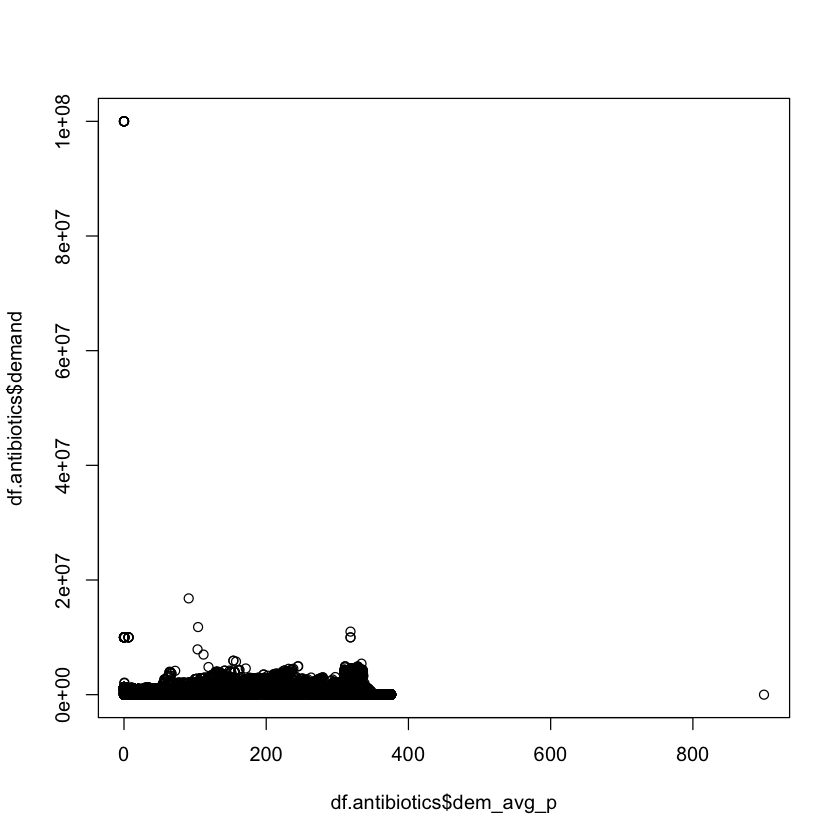

In [2]:
plot(df.antibiotics$dem_avg_p, df.antibiotics$demand)

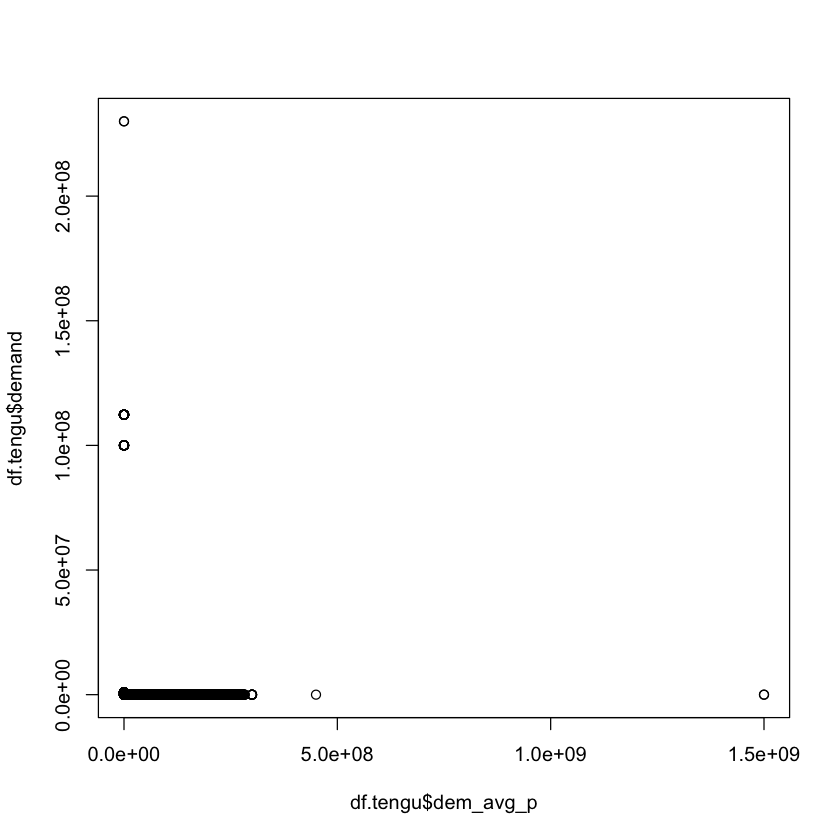

In [3]:
plot(df.tengu$dem_avg_p, df.tengu$demand)

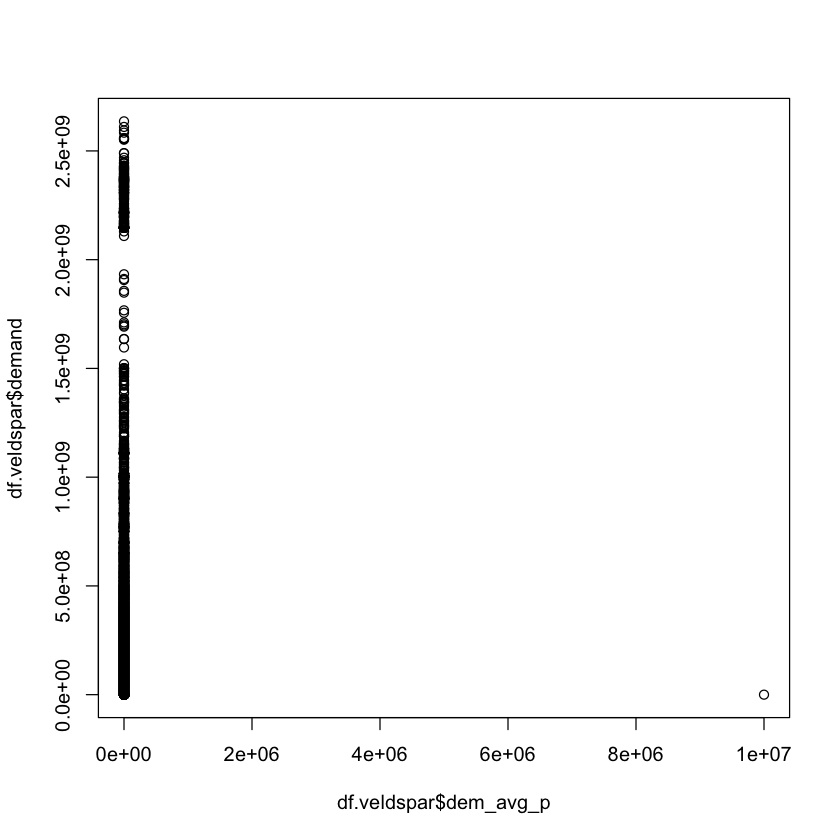

In [4]:
plot(df.veldspar$dem_avg_p, df.veldspar$demand)

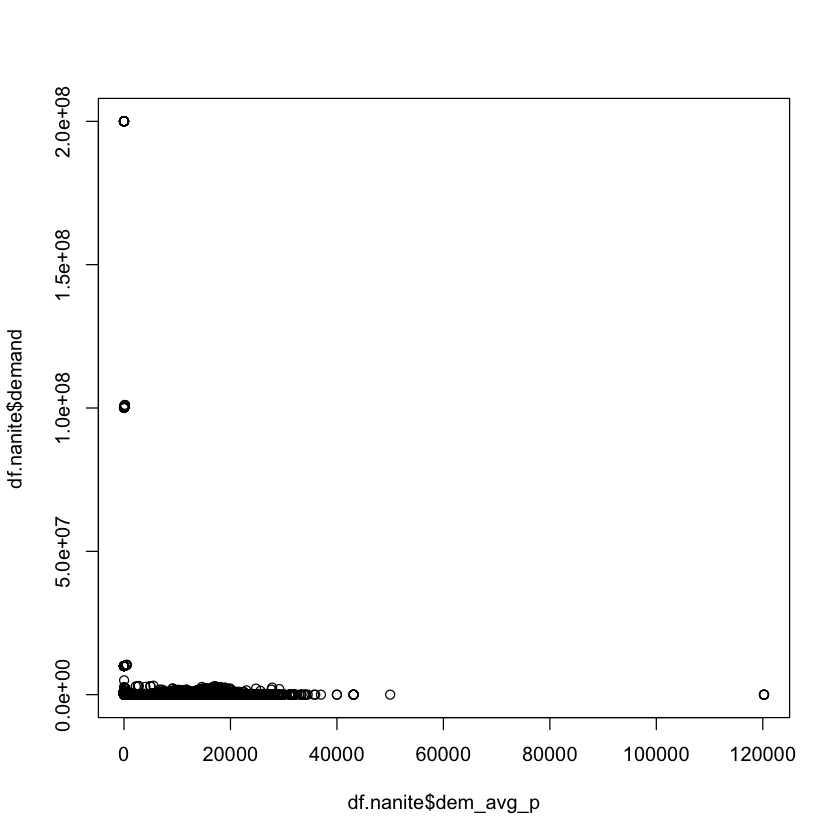

In [5]:
plot(df.nanite$dem_avg_p, df.nanite$demand)

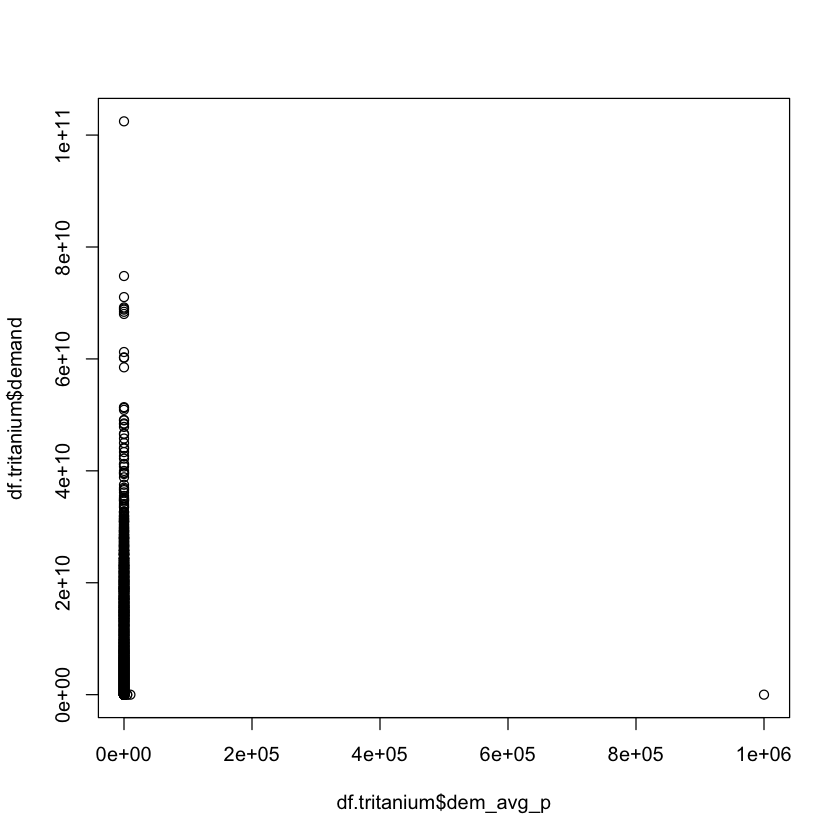

In [6]:
plot(df.tritanium$dem_avg_p, df.tritanium$demand)

---

In [8]:
# forecasts.csv holds forecasted prices in columns prefixed with `p`
# as well as forecasted demand in columns prefixed with `d`
# all data is for january 2016
df.raw <- read.csv('../output/forecasts.csv', row.names = NULL)

product.names <- unique(df.raw$product)
print(product.names)

[1] tritanium           veldspar            antibiotics        
[4] nanite repair paste tengu              
Levels: antibiotics nanite repair paste tengu tritanium veldspar


In [9]:
head(df.raw)

product,stationid,d2016.01.01,d2016.01.02,d2016.01.03,d2016.01.04,d2016.01.05,d2016.01.06,d2016.01.07,d2016.01.08,⋯,p2016.01.22,p2016.01.23,p2016.01.24,p2016.01.25,p2016.01.26,p2016.01.27,p2016.01.28,p2016.01.29,p2016.01.30,p2016.01.31
tritanium,60000004,647343.90,532335.70,507253.2,374553.50,431562.70,430683.59,614930.35,610868.2,⋯,0.51,0.55,0.65,0.70,0.79,0.89,0.96,1.02,1.08,1.18
tritanium,60000007,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tritanium,60000010,-515.51,-549.35,-571.5,-591.36,-602.87,-605.36,983.33,-584.7,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,-0.01,0.00
tritanium,60000013,6267563.19,8789130.45,10334655.4,11972838.76,14058375.48,16234837.51,18355043.48,20077061.1,⋯,1.36,1.36,1.34,1.34,1.36,1.36,1.31,1.27,1.25,1.21
tritanium,60000016,287740.22,499329.32,1482029.0,790078.65,981498.22,1109029.46,1517324.51,1574007.6,⋯,-0.06,-0.07,-0.06,-0.08,-0.08,-0.11,-0.08,-0.08,-0.07,-0.06
tritanium,60000019,-266470.49,-896013.51,-1546657.3,-2140607.65,-4616250.74,-5590155.03,-4154039.39,-4127480.4,⋯,-0.07,-0.08,-0.08,-0.07,-0.05,-0.04,-0.05,-0.05,-0.07,-0.08


In [10]:
# select the data per product, then remove the product column
# there are a total of five products in the data
df.tritanium <- df.raw[df.raw$product == 'tritanium', ]
stopifnot(dim(df.tritanium)[1] > 0)
df.tritanium <- df.tritanium[, !names(df.tritanium) %in% c("product")]

df.veldspar <- df.raw[df.raw$product == 'veldspar', ]
stopifnot(dim(df.veldspar)[1] > 0)
df.veldspar <- df.veldspar[, !names(df.veldspar) %in% c("product")]

df.antibiotics <- df.raw[df.raw$product == 'antibiotics', ]
stopifnot(dim(df.antibiotics)[1] > 0)
df.antibiotics <- df.antibiotics[, !names(df.antibiotics) %in% c("product")]

df.tengu <- df.raw[df.raw$product == 'tengu', ]
stopifnot(dim(df.tengu)[1] > 0)
df.tengu <- df.tengu[, !names(df.tengu) %in% c("product")]

df.nanite <- df.raw[df.raw$product == 'nanite repair paste', ]
stopifnot(dim(df.nanite)[1] > 0)
df.nanite <- df.nanite[, !names(df.nanite) %in% c("product")]

In [11]:
# fetch only the forecasted demand per product (also holds forecasted quantity)
df.tritanium_dem <- select(df.tritanium, starts_with("d"))
df.tengu_dem <- select(df.tengu, starts_with("d"))
df.veldspar_dem <- select(df.veldspar, starts_with("d"))
df.antibiotics_dem <- select(df.antibiotics, starts_with("d"))
df.nanite_dem <- select(df.nanite, starts_with("d"))

In [12]:
# only select positive forecasted prices/demand
df.tritanium_dem_pos <- df.tritanium_dem[rowSums(df.tritanium_dem > 0) == 31,]
df.tengu_dem_pos <- df.tengu_dem[rowSums(df.tengu_dem > 0) == 31,]
df.veldspar_dem_pos <- df.veldspar_dem[rowSums(df.veldspar_dem > 0) == 31,]
df.antibiotics_dem_pos <- df.antibiotics_dem[rowSums(df.antibiotics_dem > 0) == 31,]
df.nanite_dem_pos <- df.nanite_dem[rowSums(df.nanite_dem > 0) == 31,]

[1] 6080
[1] 1485
[1] "---"
[1] 2860
[1] 350
[1] "---"
[1] 4676
[1] 880
[1] "---"
[1] 2870
[1] 445
[1] "---"
[1] 4484
[1] 473


In [13]:
head(df.antibiotics_dem_pos)

,d2016.01.01,d2016.01.02,d2016.01.03,d2016.01.04,d2016.01.05,d2016.01.06,d2016.01.07,d2016.01.08,d2016.01.09,d2016.01.10,⋯,d2016.01.22,d2016.01.23,d2016.01.24,d2016.01.25,d2016.01.26,d2016.01.27,d2016.01.28,d2016.01.29,d2016.01.30,d2016.01.31
10757,59488.63,57997.87,61130.91,59004.90,60213.26,58831.01,62686.92,62540.03,61149.28,64321.38,⋯,65706.95,63816.50,66492.92,63867.91,64549.90,62628.92,65948.30,65280.80,63397.90,66117.32
10758,61773.43,61770.01,64518.93,62903.47,65218.47,64402.21,68339.27,68725.47,68784.15,71480.84,⋯,73872.94,72584.68,73921.34,70794.32,71528.17,69091.75,71400.38,70180.14,68683.44,69903.07
10759,58054.94,57302.81,59687.85,57274.74,58304.07,56205.85,59818.56,59441.80,58777.39,61219.00,⋯,61542.87,60699.59,62960.96,60398.40,61259.33,58980.45,62406.62,61843.38,60997.84,63268.22
10760,56903.62,56043.96,58313.23,55815.95,56772.47,54616.70,58179.70,57772.91,57093.72,59516.90,⋯,60601.31,59841.97,62164.10,59676.27,60603.36,58384.21,61854.91,61332.01,60517.89,62792.05
10761,55387.37,54463.73,56659.33,54099.16,54999.21,52786.60,56295.23,55841.92,55120.21,57494.57,⋯,58460.41,57713.55,60038.08,57561.92,58504.51,56296.86,59777.04,59266.19,58462.17,60733.72
10762,55613.33,54721.59,56957.03,54428.68,55356.82,53172.78,56704.81,56274.17,55572.97,57973.96,⋯,58972.32,58216.08,60539.30,58054.54,58986.14,56769.85,60238.58,59718.31,58905.88,61178.54
10763,52723.96,52751.57,52197.74,50610.79,51167.71,51967.97,51930.16,52260.44,52637.13,52426.71,⋯,55992.79,56471.33,56294.68,55007.58,55785.26,56727.27,56754.02,57075.10,57373.73,57022.54
10764,51450.48,51587.98,50952.17,49189.58,50043.23,50941.65,50984.38,51678.05,52117.09,51759.44,⋯,54855.72,55237.17,54777.30,53125.39,54028.88,54922.12,54911.68,55512.15,55826.52,55321.64
10765,51438.83,51485.82,50744.64,49185.23,49964.25,50797.52,50787.31,51151.53,51561.69,51172.24,⋯,55063.47,55538.29,55145.59,53853.08,54817.07,55754.86,55771.88,56090.76,56389.08,55828.45
10766,50990.73,51013.33,50241.27,48659.53,49417.22,50230.38,50199.90,50547.72,50943.91,50535.44,⋯,54433.82,54919.39,54530.62,53249.74,54225.04,55173.62,55199.13,55527.91,55835.80,55276.77


### ES

In [19]:
library("cmaes")

In [20]:
init.vector <- function(stations, p = NULL, q = NULL) {
    # creates a three-dimensional array for
    # (station, price + demand per day of january (62 entries))
    # stations: numerical ids of stations
    # p: estimated price, if NULL initalized by zeros
    # q: estimated quantity, if NULL initalized by zeros
    stations.len <- length(stations)
    v <- rep(0, stations.len * 62)
    dim(v) <- c(stations.len, 2, 31)

    if (is.null(p)) {
        p <- rep(0, 31)
    }

    if (is.null(q)) {
        q <- rep(0, 31)
    }

    for (s in 1:stations.len) {
        v[s, 1, ] <- p
        v[s, 2, ] <- q
    }

    return(v)
}

# i.e.
enc.veldspar <- init.vector(unique(df.veldspar$stationid)) # , q = df.veldspar_dem_pos)


In [21]:
cost.function.flat(enc.veldspar)

ERROR: Error in eval(expr, envir, enclos): could not find function "cost.function.flat"


In [22]:
# implements the fitness
cost.function.flat <- function(x, max.supply, max = TRUE) {
    # sum_s sum_t q_st * p_st
    o <- 0
    q <- 0
    stations <- dim(x)[1]

    # TODO: possible improvement
    # * weight "error" by distance in IQR of estimated demand
    # by accepting everything in +- 1.5 * estimated demand (as mean)
    # and "rejecting" everything outside
    for (s in 1:stations) {
        q = q + x[s, 1, ]
        o = o + sum(x[s, 1, ] * x[s, 2, ])
    }

    if (max) {
        if (q > max.supply) {
            return 0
        }

        return(o)
    } else {
        # minimization
        if (q > max.supply) {
            return(Inf)
        }
        
        return(-o)
    }
}

In [ ]:
# kills the R session …
out.veldspar <- cmaes::cma_es(par = enc.veldspar, cost.function.flat, max = FALSE, max.supply = 40000000) #, lower = rep(length(enc.veldspar), 0)) 

## Unused

In [ ]:
# unused and incorrect/incomplete
# this code is per product per station!
# see: http://www.scholarpedia.org/article/Evolution_strategies

# x_k is a matrix in 2x31
# as per convention:
# 1. row is the quantity
# 2. row is the price
# TODO: flatten the tensor to a vector (31 * q, 31 * d, ?)

# stop criteria
max.iter <- 1e-8
sigma.tolerance <- 1e-12 * sigma.init
is.feasible <- function(p, p_hat, Q) {
    # the x vector is the first element of the individual
    x_k <- p_hat[1]
    q = x_k[1]
    p = x_k[2]

    if (!all(x_k >= 0)) {
        return(FALSE)
    }

    # exceeds the given supply
    if (sum(q) > Q) {
        return(FALSE)
    }

    # is in IQR of the estimated price
    if (!(0.5 * p_hat <= p && p <= 1.5 * p_hat)) {
        return(FALSE)
    }

    return(TRUE)
}

sort.pop <- function(pop, mu, obj.fun) {
    ranks <- rank(mapply(pop, FUN = obj.fun))
    # TODO: resort population according to rank
}

# mutates one offspring
mutate <- function(x, sigma, mu, rho, parents) {
    # select rho parents to use for recombination
    # if mu equals rho, the whole parent population is used
    if (mu == rho) {
        considered.pars <- parens
    } else {
        considered.pars <- sample(x = parents, size = rho)
    }

    sigma_i <- sigma_i * tao * rnorm(1,0)
    x <- x * sigma_i * rnorm(1, mean = 0)
    # TODO: mutate until the offsprings are feasible

    return (x, sigma_i)
}

# implements the fitness
cost.function <- function(x_k, max = TRUE) {
    # sum_s sum_t q_st * p_st
    o <- sum(x_k[1,] * x_k[2,])

    if (max) {
        return(o)
    }

    return(-o)
}

es <- function(x_0, is.feasible, cost.function, lambda = 12, mu = 6, sigma_0 = 0.5,
               max = TRUE, max.iter = 1000, best.fit = FALSE) {
    tao <- 1 / sqrt(2 * length(x_0))

    # every offspring shall adhere to the order of the tuple:
    # (x, mutation factor, fitness)
    best.fit <- c(x_0, sigma_0, cost.function(x_0))
    population <- rep(best.fit, mu)
    init.pop <- mapply(mutate, population)
    pop.sorted <- sort.pop(init.pop)

    i <- 1
    while (i <= max.iter && pop.sorted[1][2] <= sigma.tolerance) {
        if (pop.sorted[1][3] > best.fit[3]) {
            best_fit <- c(pop.sorted[1][1], )
        }
    }

    if (best.fit) {
        return best.fit
    }
    return c(pop.sorted[1])
}

In [98]:
# unused:
# evolution strategies for one product and as of now, one station
lambda = 10
mu = 5

# 31 days of january
N = 31

start <- matrix(c(rep(0, N)), c(rep(0, N)), ncol=N, nrow=2)

# T: 31
# s: ?

f <- function(x) {
    sum(sum(x))
}

# supply numbers
# tengu, nanite, antibiotics, veldspar, tritanium
# b <- c(10, 40000, 1000000, 40000000, 200000000)

cma_es(start, f) #, lower, upper, control=list())

ERROR: Error in xmean + sigma * (BD %*% arz): non-conformable arrays


---

#### Optimierungsproblem einer Station:

Sei Produkt $i\in\mathcal{I}$ beliebig.

$$
-\sum_{s\in\mathcal{S}}\sum_{t\in\mathcal{T}} p_{st}\cdot x_{st} \;\; \rightarrow \min\\
\text{u.d.N.:}\\
\sum_{s\in\mathcal{S}}\sum_{t\in\mathcal{T}}x_{st} \leq b_i\\
x_{sti}\geq 0\\
x_{sti}\leq\hat{x}_{sti}
$$

mit $p_{st}$ Preis , $x_{st}$ Produktmenge an Tag $t$ auf Station $s$.

---
Alternative Formulierung (i):

$$
\sum_s\sum_t\sum_i x_{sti}\cdot p_{sti} -\left|\hat{x}_{sti}-x_{sti}\right|x_{sti}
$$
u.d.N.: (für jedes $i$)
* $x_{st}\geq 0 \forall s,t$
* $x_{st}\leq\hat{x}_{st} \forall s,t$
* $\sum_s\sum_t x_{st} \leq b_i$